# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner. 

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors. 

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [93]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [94]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule** 

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**: 
\begin{align}
L(\theta) & = \prod_{i}^{m} h_\theta(x_i)^{y_i} (1 - h_\theta(x_i))^{1 - y_i}
\end{align}

- **Log-Likelihood**: 
\begin{align}
l(\theta) &= 
\log L(\theta) = \log \left[ \prod_{i}^{m} h_\theta(x_i)^{y_i} (1 - h_\theta(x_i))^{1 - y_i} \right] = \sum_{i}^{m} \log \left[ h_\theta(x_i)^{y_i} (1 - h_\theta(x_i))^{1 - y_i} \right] = \sum_{i}^{m} \left[ y_i \log h_\theta(x_i) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
\end{align}

    Substituting $h_\theta(x_i) = \frac{1}{1 + \exp(-\theta^T x_i)}$ into the log-likelihood:
$$
l(\theta) = \sum_{i}^{m} \left( y_i \log\left( \frac{1}{1 + e^{(-\theta^T x_i)}} \right) + (1 - y_i) \log\left( 1 - \frac{1}{1 + e^{(-\theta^T x_i)}} \right) \right)
$$

- **Gradient of log-likelihood** (slide 5 p. 20):

Knowing that $h_\theta(x) = \frac{1}{1 + e^{(-\theta^T x)}}$ and $\frac{d h_\theta(x)}{dx} = h_\theta(x)(1 - h_\theta(x))x$:

$$
\begin{align} 
\frac{\delta}{\delta \theta_j} log(h_\theta(x_{i})) &= \frac{1}{h_\theta(x_{i})} \frac{\delta}{\delta \theta_j} \left( \frac{1}{1 + e^{(-\theta^T x_{i})}} \right) \ &= \frac{1}{h_\theta(x_{i})} \cdot \frac{e^{(-\theta^T x_{i})}}{(1 + e^{(-\theta^T x_{i})})^2} \cdot x_{i,j} \ &= (1 - h_\theta(x_{i})) \cdot x_{i,j}
\end{align}
$$

and:
$$
\frac{\delta}{\delta \theta_j} log(1 - h_\theta(x_{i})) = -h_\theta(x_{i}) \cdot x_{i,j}
$$

so if we apply this we can assume that:

$$
\begin{align}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i}^{m} (y_{i} - h_\theta(x_{i})) x_{i,j}
\end{align}
$$
Where $x_{i,j}$ is the j-th feature of the input and $x_i$ denotes the entire input vector for the i-th training example

- **Gradient update equation**: 
For  $j=0,...,n$:
\begin{equation}
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} (l(\theta_0, \theta_1))
\end{equation}

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters. 
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [95]:
from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [96]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.03199609311712859


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [97]:
data = pd.read_csv("assets/train.csv")
data.head()

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/> 

In [98]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [99]:
##############################################
###             YOUR CODE HERE           #####
##############################################
scaler = StandardScaler()
X[['bill_length', 'body_mass']] = scaler.fit_transform(X[['bill_length', 'body_mass']])



/var/folders/gq/prsnx2f54hjfq219pq9779gh0000gn/T/ipykernel_10751/1849492628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['bill_length', 'body_mass']] = scaler.fit_transform(X[['bill_length', 'body_mass']])


We add a column of 1's to $X$ to take into account the intercept.

In [100]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]] 
X

/var/folders/gq/prsnx2f54hjfq219pq9779gh0000gn/T/ipykernel_10751/1330601637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bias"] = 1


,bias,bill_length,body_mass
0,1,0.445499,-0.751204
1,1,1.025744,-0.509130
2,1,-0.375551,-0.413156
5,1,0.438696,0.635719
6,1,-1.501349,0.579251
...,...,...,...
196,1,0.811468,0.193173
197,1,-0.793219,-0.316630
198,1,-1.433325,0.094282
199,1,0.791061,-0.037160


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [101]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

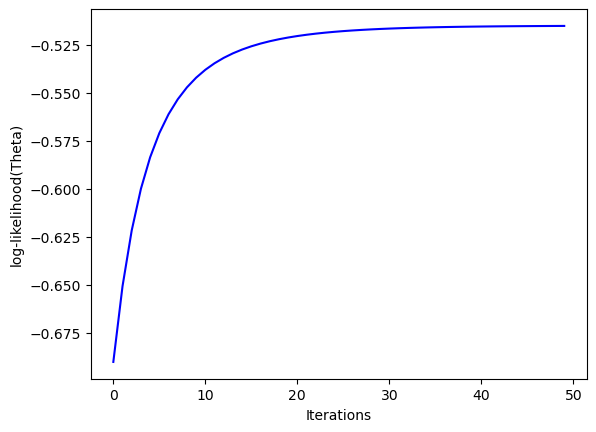

In [102]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

(-2.4699595998040142, 2.5803777103306857)

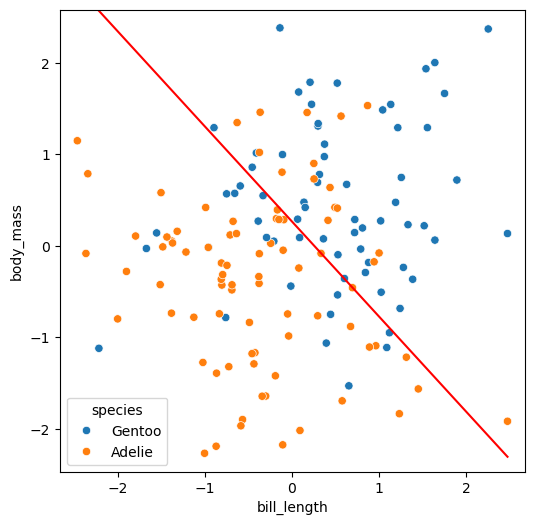

In [103]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)


In [104]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule? 
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. We are looking for a local maximum because the goal of gradient ascent is to maximize log-likelihood.
2. We are trying to maximize log-likelihood, so we need to use gradient ascent, which is meant to increase the value of log-likelihood, not decrease it.
3. A low learning rate makes the process slow but stable, while too high a rate can lead to instability; the number of iterations, on the other hand, must be adequate to prevent the model from remaining inaccurate (underfitting) or becoming too specific to the training data (overfitting).
4. If the data are not normalized, variables with different scales affect the algorithm unevenly. This can slow down the process and prevent accurate results because one larger variable may “dominate” the others, causing incorrect parameter estimates.
5. *(feel free to add here screenshots or new code cells if needed)*



-------------------------------------------------------

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression** 

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). 
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

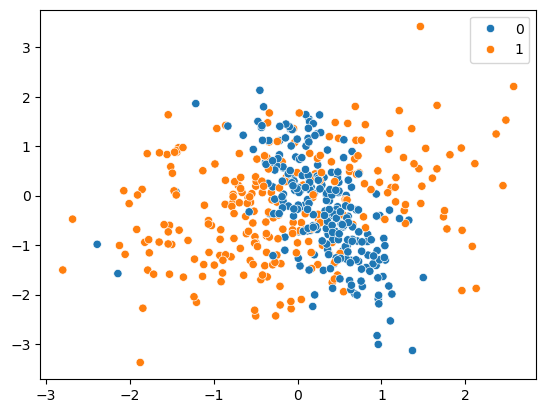

In [105]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [106]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:YOUR
        X: the final polynomial features
    """
    if degree < 2:
        return X
    
    features = np.ones(X.shape[0])
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    c1 = X[:,1]
    c2 = X[:,2]
    exponents = []
    for d in range(1,degree + 1):
        for i in range(d + 1):
            j = d - i
            exponents.append((j, i))
    
    for _, (exp_x1, exp_x2) in enumerate(exponents):
        new_feature = (c1 ** exp_x1) * (c2 ** exp_x2)
        features = np.column_stack((features, new_feature))
    
    return features


**Do not write below this line just run it**

--------------------------------------------

In [107]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)




(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

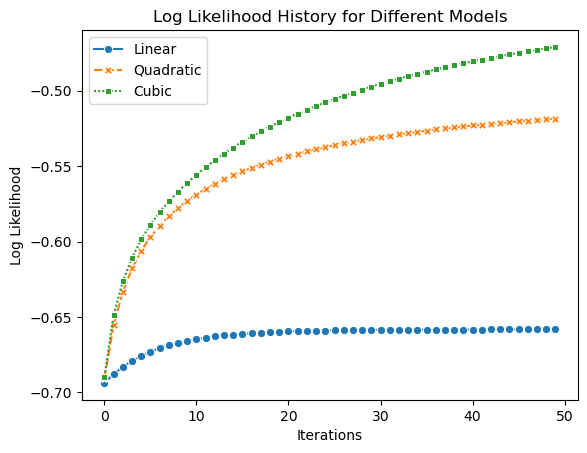

In [108]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary** 

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [109]:

def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """
    
    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################


    exponents = []
    for d in range(degree + 1): 
        for i in range(d + 1):  
            j = d - i  
            exponents.append((j, i))

    f = np.zeros_like(x1_vec)
    for idx, (exp_x1, exp_x2) in enumerate(exponents):
        f += theta_final[idx] * (x1_vec ** exp_x1) * (x2_vec ** exp_x2)

    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

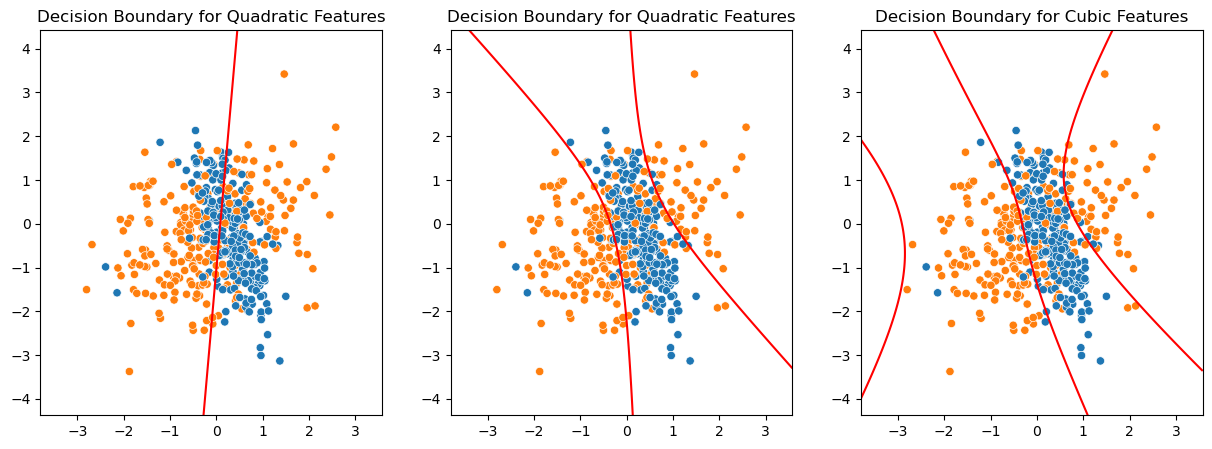

In [110]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)

    plt.contour(
        x1_vec, x2_vec, f, colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [111]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)    

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))
        
    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:01<00:00, 14.46it/s]


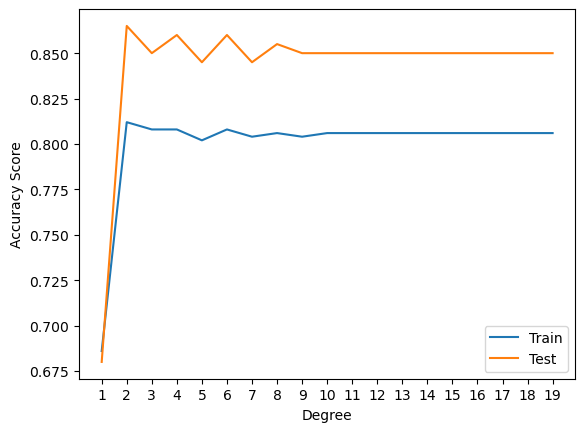

In [112]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

Text(0.5, 1.0, 'Worst Decision Boundary (Grade 5)')

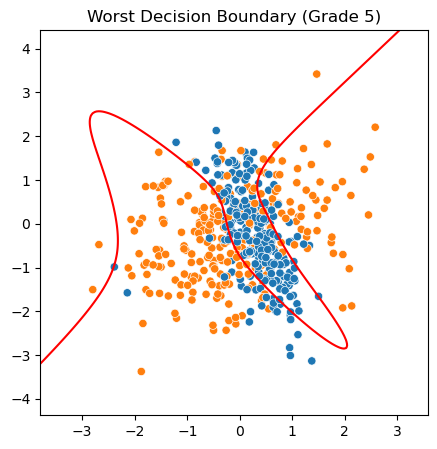

In [113]:
# Plot worst model

best_degree_idx = np.argmax(accuracy_scores_test)
worst_degree_idx = np.argmin(accuracy_scores_test[1:]) + 1


plt.figure(figsize=(5, 5))
plot_boundary_function(X, y, thetas[worst_degree_idx], degree=degrees[worst_degree_idx])
plt.title("Worst Decision Boundary (Grade {})".format(degrees[worst_degree_idx]))

Text(0.5, 1.0, 'Best Decision Boundary (Degree 2)')

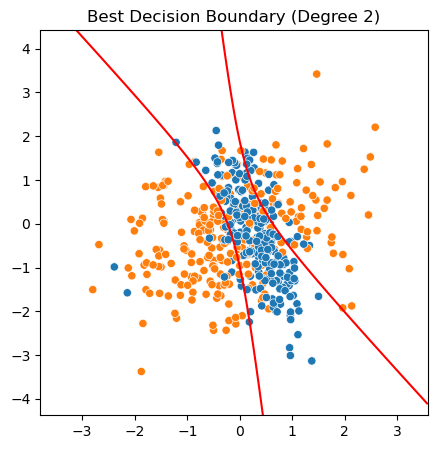

In [114]:
# Plot best model
plt.figure(figsize=(5, 5))
plot_boundary_function(X, y, thetas[best_degree_idx], degree=degrees[best_degree_idx])
plt.title("Best Decision Boundary (Degree {})".format(degrees[best_degree_idx]))


#### **Report** 
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer. 
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1.  Looking at the generated graphs, it can be seen that the linear, quadratic and cubic decision boundaries show different levels of complexity. The linear decision boundary is simple and may not capture the complexity of the data. The quadratic boundary allows for more flexibility, adapting better to the data. The cubic boundary introduces even more complexity, potentially overfitting the training data
By increasing the degree of the polynomial, the model does not necessarily improve in performance. Underfitting can occur if the degree is too low, but overfitting can also occur if the degree is too high. Overfitting occurs when the model learns the training data too well, resulting in poor generalization to new data. Finally the answer is no, cause increasing the degree you can incur in overfitting and not in underfitting.


2.  The plot of training and test accuracy as a function of polynomial degree shows a clear indication of overfitting.As the degree increases, the training accuracy continues to improve, while the test accuracy starts to decrease after a certain point.This is because the model is learning the training data too well, adapting to noise and peculiarities that are not present in the test data.
The difference between the best and worst test accuracy highlights the importance of choosing the right polynomial degree.Too high a degree leads to a complex decision boundary that overfits, resulting in poor performance on unseen dataToo high a degree leads to a complex decision boundary that overfits, resulting in poor performance on unseen data.Too high a degree leads to a complex decision boundary that overfits, resulting in poor performance on unseen data.In general, it is undesirable to have a very complex decision boundary, i.e., a very high polynomial degree. Although a more complex decision boundary can potentially fit the training data better, it also increases the risk of overfitting. The goal is to strike a balance between model complexity and generalization ability, with the goal of achieving good performance on both training data and unseen data.


3.Overfitting occurs for several reasons, for example:
- The size of the training data is too small and does not contain enough data samples to accurately represent all possible values of the input data.
- The training data contains large amounts of irrelevant information, called noisy data.
- The model is trained too long on a single sample data set.
- The complexity of the model is high, so the model recognizes noise within the training data.



-------------------------------------------------------

### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization. 

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [115]:
from libs.models import LogisticRegressionPenalized

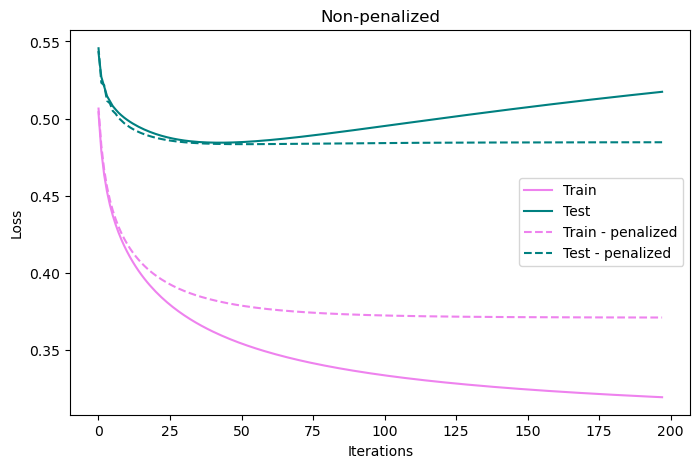

In [116]:
X,y = make_classification(
    n_samples=500, 
    n_features=100, 
    n_informative=50, 
    n_redundant=25, 
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best: 

Best lambda: 0.2


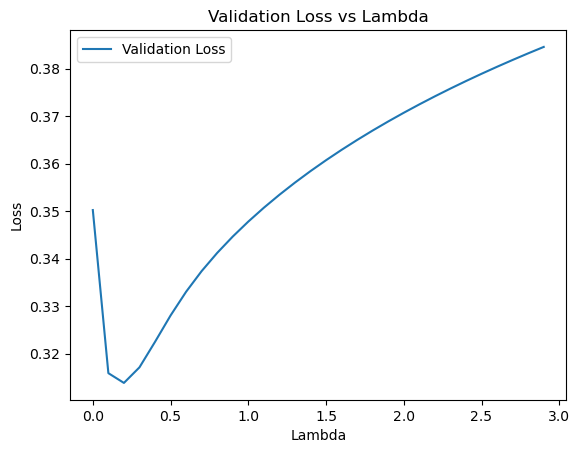

In [117]:
lambdas = np.arange(0, 3, 0.1)
losses = []
penalized_lambdas = LogisticRegressionPenalized(X.shape[1], lambdas[0])
for lambda_ in lambdas:
    ##############################################
    ###         COMPLETE THIS FOR-LOOP         ###
    ##############################################
    penalized_lambdas.lambda_ = lambda_
    pen_history_lambdas, _ = fit(penalized_lambdas, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
    
    mean_loss = -np.mean(pen_history_lambdas)
    losses.append(mean_loss)

    #NON SO SE SI FA COSI'

    pass

if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]}")

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1.  When using unpenalized logistic regression, the model tries to fit the training data as closely as possible, maximizing the likelihood of the observed data without any restriction on the coefficients. This can lead to overfitting, in which the model learns the training data too well, including random patterns and noise, and is unable to generalize to new data. In other words, the model becomes too complex, capturing the noise in the training data instead of learning the true underlying patterns.

2.  The loss plot shows that the training loss is lower in the unpenalized case. This is because the non-penalized logistic regression imposes no restrictions on the complexity of the model, allowing it to fit the training data more precisely. However, lower training loss does not necessarily imply that the non-penalized model is better overall. As evidenced by the graph, the non-penalized model has a higher validation loss than the penalized model. This indicates that the non-penalized model is overfitting on the training data, compromising its ability to generalize to new data.

3.  The convergence rate refers to the speed at which the optimization algorithm (e.g., gradient descent) reaches a solution. Penalization affects the convergence rate by making the cost function more regular. A smoother cost function has fewer local minima, which makes it easier for the optimization algorithm to converge. Penalization can also reduce the oscillation of the optimization algorithm, which leads to faster convergence.
In general, penalization can lead to a slower convergence rate, but appropriate penalization can help prevent overfitting and improve the overall performance of the model.

-------------------------------------------------------

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K. 
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*. 
In the first of this exercise we have to: 
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples 
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = -\sum_{i=1}^{N}\sum_{k=1}^{K} y_{ik} log(p_{ik}) 
\end{align*}

\begin{align*}
Loss(\theta) = -\frac{1}{N} \sum_{i=1}^{N}\sum_{k=1}^{K} y_{ik} log(p_{ik}) 
\end{align*}


\begin{align*}
\nabla_{\theta_k} L(\theta) = -\sum_{i=1}^{N} X_i (y_{ik} - p_{ik})
\end{align*}


### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [118]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [119]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [120]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)


train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 38.72%
Test accuracy: 38.30%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [121]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [122]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

##############################################
###          FILL IN THIS CODE           #####
##############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
## Import everything you need here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=3),
    StandardScaler()
)

categoric_transfomer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='if_binary'),
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categoric_transfomer, categorical_cols)
    ],
    remainder='drop'
)

pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=4))
if len(pipe.named_steps)>0:
    display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [123]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.71      0.75      0.73        20
   Chinstrap       0.71      0.56      0.62         9
      Gentoo       0.62      0.67      0.64        12

    accuracy                           0.68        41
   macro avg       0.68      0.66      0.67        41
weighted avg       0.69      0.68      0.68        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters: 

In [124]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__num__polynomialfeatures__degree: 3
columntransformer__num__polynomialfeatures__order: C
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__drop: if_binary
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: error
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 4
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [125]:
from sklearn.model_selection import GridSearchCV

grid = dict(
    kneighborsclassifier__n_neighbors= [7,11,13],  
    columntransformer__num__polynomialfeatures__degree= [1, 2, 4, 5, 6, 7, 8],  
    columntransformer__num__simpleimputer__strategy= ['mean', 'median'],    
)

pipe_cv = GridSearchCV(pipe, grid, cv=5, scoring='accuracy')
if pipe_cv is not None:
    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

Best score: 0.7827651515151516
columntransformer__num__polynomialfeatures__degree: 1
columntransformer__num__simpleimputer__strategy: mean
kneighborsclassifier__n_neighbors: 13


`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [126]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.88      0.70      0.78        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.75      1.00      0.86        12

    accuracy                           0.80        41
   macro avg       0.80      0.83      0.80        41
weighted avg       0.82      0.80      0.80        41



#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

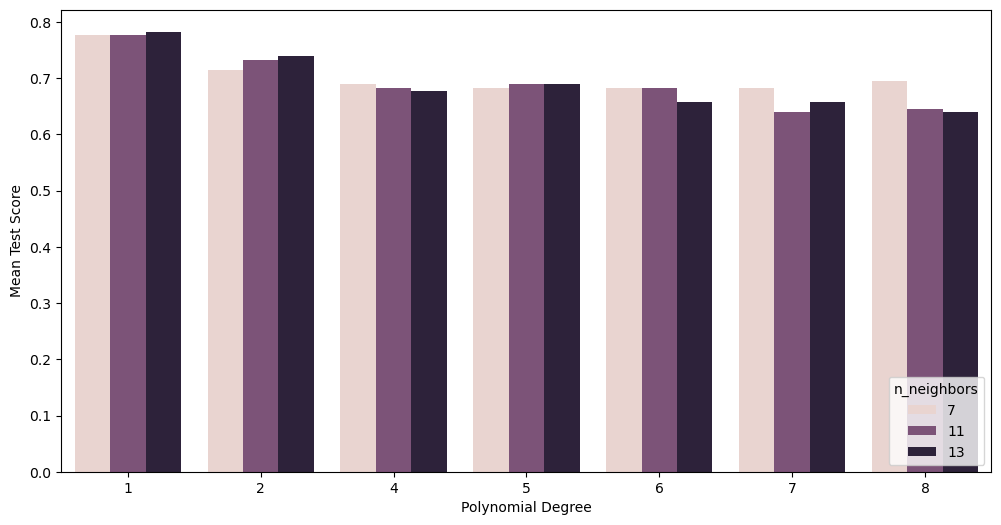

Train accuracy: 0.832
Validation accuracy: 0.805


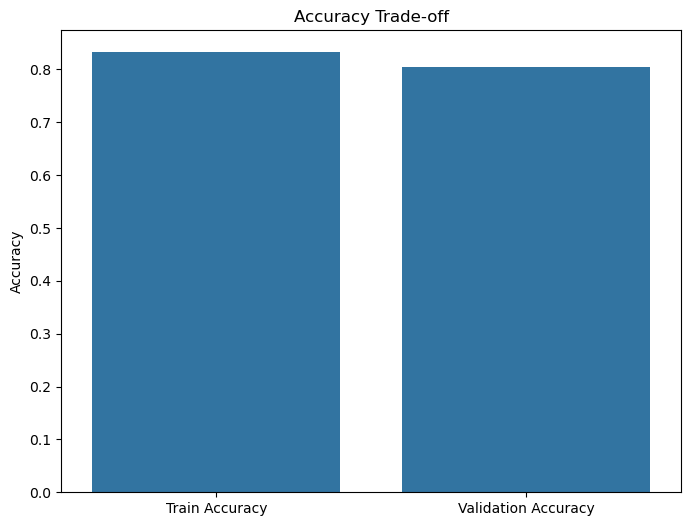

In [127]:
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

##############################################
###                YOUR CODE HERE         ####
##############################################
grouped_data = cv_res.groupby(["degree", "n_neighbors"])["mean_test_score"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_data,
    x="degree",              
    y="mean_test_score",     
    hue="n_neighbors",       
)

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Test Score")
plt.legend(title="n_neighbors", loc="lower right")
plt.show()

train_accuracy = pipe_cv.best_estimator_.score(X_train, y_train)
val_accuracy = pipe_cv.best_estimator_.score(X_val, y_val)
print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Validation accuracy: {val_accuracy:.3f}")

plt.figure(figsize=(8, 6))
sns.barplot(x=["Train Accuracy", "Validation Accuracy"], y=[train_accuracy, val_accuracy])
plt.title("Accuracy Trade-off")
plt.ylabel("Accuracy")
plt.show()


--------------------------------------------

**Write your answer below this line**

1. The number of total combination is given by the product of every possible value of the hyperparameters. 
   Considering that: 
                  
                  kneighborsclassifier__n_neighbors= [7,11,13] (3 values)

                  columntransformer__num__polynomialfeatures__degree= [1, 2, 4, 5, 6, 7, 8] (7 values)

                  columntransformer__num__simpleimputer__strategy= ['mean', 'median'] (two values)
                     
   The total number of combination is: $3 \cdot 7 \cdot 2 = 42$

2.
   
3. Higher polinomial degrees can reduce performance due to overfitting. Looking at the first bar plot above, test's mean score tent to be lower for degrees higher then 2.  A higher polynomial degree creates a tighter decision boundary, which may not optimally generalise the training 

4. The classifiers didn't obtain the same accuracy score on training and validation set. The difference between the two values is $Train\_Acc - Val\_Acc = 0.027$, this value is very low but it may indicate that the model is slightly overfitting. 

--------------------------------------------

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [128]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [129]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#####################################################
##              YOUR CODE HERE                     ##
#####################################################
train_s = len(full_train_dataset) * 80 // 100
val_s = len(full_train_dataset) * 20 // 100

dataset_split = torch.utils.data.random_split(full_train_dataset, [train_s, val_s])


# use these names for the data loaders
train_loader = torch.utils.data.DataLoader(dataset_split[0], batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)
val_loader = torch.utils.data.DataLoader(dataset_split[1], batch_size=64)

print(f"Sizes of each dataset: (train, test, val) = ({len(dataset_split[0])}, {len(test_dataset)}, {len(dataset_split[1])})")

Files already downloaded and verified
Files already downloaded and verified
Sizes of each dataset: (train, test, val) = (40000, 10000, 10000)


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [130]:
from libs.models import PoorPerformingCNN

net = PoorPerformingCNN()

Loss Function and optimizer

In [131]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [132]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################
    
    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    _, y_pred = torch.max(outputs.data, 1)
    correct = (y_pred == labels).sum().item()
    train_accuracy = correct / labels.size(0)
    train_accuracies.append(train_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()


    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 1.8841, Training Accuracy: 0.3750
Epoch 1, Average Validation Loss: 1.6781, Validation Accuracy: 0.4082
Epoch 2, Average Training Loss: 1.6333, Training Accuracy: 0.4219
Epoch 2, Average Validation Loss: 1.5742, Validation Accuracy: 0.4465
Epoch 3, Average Training Loss: 1.5569, Training Accuracy: 0.4219
Epoch 3, Average Validation Loss: 1.5134, Validation Accuracy: 0.4677
Epoch 4, Average Training Loss: 1.5035, Training Accuracy: 0.4375
Epoch 4, Average Validation Loss: 1.4691, Validation Accuracy: 0.4811
Epoch 5, Average Training Loss: 1.4620, Training Accuracy: 0.5156
Epoch 5, Average Validation Loss: 1.4358, Validation Accuracy: 0.4934
Epoch 6, Average Training Loss: 1.4277, Training Accuracy: 0.5156
Epoch 6, Average Validation Loss: 1.4081, Validation Accuracy: 0.4995
Epoch 7, Average Training Loss: 1.3989, Training Accuracy: 0.5469
Epoch 7, Average Validation Loss: 1.3843, Validation Accuracy: 0.5061
Epoch 8, Average Training Loss: 1.3753, Training

### 4.4: Evaluate

In [133]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 51.81%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? Plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Class imbalance can be a challenge when training a machine learning model. The model may become biased towards the majority class. This means that the model can achieve high accuracy score predicting the majority class, but low accuracy in predicting the minority class. 

2. There are different strategies to address class imbalance in a dataset or a training process. **subsamling** can be a solution, it removes samples from the majority class to balance the dataset. Another solution can be the **oversampling**, duplicating samples from the minority class can balance the dataset. Finally, **class weighting** can be a strategy, assigning different weights to differents classes during training to give more weight to the minority class. 

3. Considering accuracy alone can be misleading as performance measure in presence of class imbalance because a model can achieve high accuracy score by predicting always the majority class. In this case it is possible to use other metrics, such as F1 score, to assess model performance. 

4. Cifar-10 is a balanced dataset with 6000 images for each class, because the number of samples for each class is equivalent.

-------------------------------------------------------

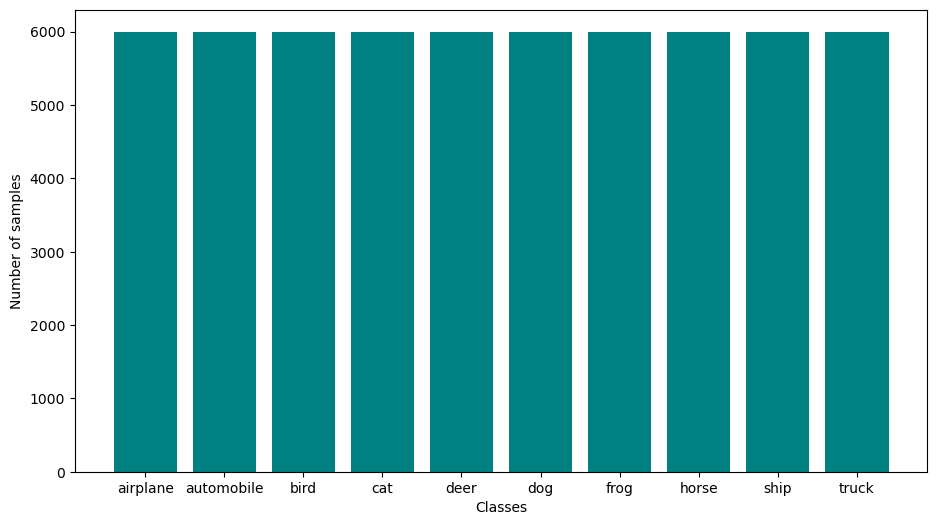

In [134]:
train_labels = full_train_dataset.targets
test_labels = test_dataset.targets

all_labels = train_labels + test_labels

class_names = full_train_dataset.classes

num_classes = len(class_names)
class_counts = [0] * num_classes

for label in all_labels:
    class_counts[label] += 1

plt.figure(figsize=(11, 6))
plt.bar(class_names, class_counts, color='teal')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.show()

## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [136]:
from libs.models import CustomCNN

net = CustomCNN().to(device)

#### Training

In [137]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


Epoch 1, Loss: 1.4890
Epoch 2, Loss: 1.1348
Epoch 3, Loss: 0.9850
Epoch 4, Loss: 0.8851
Epoch 5, Loss: 0.8065
Epoch 6, Loss: 0.7453
Epoch 7, Loss: 0.6858
Epoch 8, Loss: 0.6251
Epoch 9, Loss: 0.5737
Epoch 10, Loss: 0.5182
Finished Training


#### Evaluation

In [138]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 70.02%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [139]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [140]:
#####################################################
##              YOUR CODE HERE                     ##
#####################################################

model = models.alexnet(pretrained=True)

# Modifica il classificatore per adattarlo a CIFAR-10
num_classes = 10
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Congela tutti gli strati tranne l'ultimo fully connected
for param in model.features.parameters():
    param.requires_grad = False

#####################################################
##              END OF YOUR CODE                   ##
#####################################################
model = model.to(device)

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [141]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Epoch 1, Loss: 0.7700
Finished Training
Accuracy on the test images: 80.18%
